In [1]:
import numpy as np
import os

In [2]:
base_dir = '/content'

model_cnn_3d_history = np.load(os.path.join(base_dir, 'model_cnn_3d_history.npy'), allow_pickle=True)
model_cnn_lstm_history = np.load(os.path.join(base_dir, 'model_cnn_lstm_history.npy'), allow_pickle=True)
model_vgg16_lstm_history = np.load(os.path.join(base_dir, 'model_vgg16_lstm_history.npy'), allow_pickle=True)
model_hrnet_lstm_history = np.load(os.path.join(base_dir, 'model_hrnet_lstm_history.npy'), allow_pickle=True)

## Training accuracy

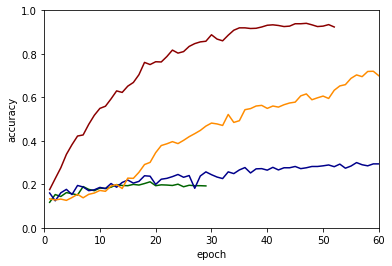

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

epoch_stop = 60
epochs=np.arange(1, epoch_stop+1)

acc1 = model_cnn_lstm_history[()]["accuracy"]
acc2 = model_cnn_3d_history[()]["accuracy"]
acc3 = model_vgg16_lstm_history[()]["accuracy"]
acc4 = model_hrnet_lstm_history[()]["accuracy"]

acc1 = np.pad(acc1, (0,epoch_stop-len(acc1)), 'constant', constant_values=None)
acc2 = np.pad(acc2, (0,epoch_stop-len(acc2)), 'constant', constant_values=None)
acc3 = np.pad(acc3, (0,epoch_stop-len(acc3)), 'constant', constant_values=None)
acc4 = np.pad(acc4, (0,epoch_stop-len(acc4)), 'constant', constant_values=None)

plt.plot(epochs, acc1, label = "CNN + LSTM (Baseline 1)", color = 'darkgreen')
plt.plot(epochs, acc2, label = "Conv-3D (Baseline 2)", color = 'darkblue')
plt.plot(epochs, acc3, label = "VGG-16 Features + LSTM", color = 'darkorange')
plt.plot(epochs, acc4, label = "HRNet Features + LSTM", color = 'darkred')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axis([0, 60, 0, 1])
plt.show()


## Validation accuracy

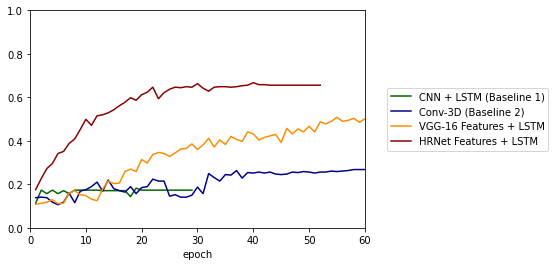

In [4]:
import matplotlib.pyplot as plt

epoch_stop = 60
epochs=np.arange(1, epoch_stop+1)

acc1 = model_cnn_lstm_history[()]["val_accuracy"]
acc2 = model_cnn_3d_history[()]["val_accuracy"]
acc3 = model_vgg16_lstm_history[()]["val_accuracy"]
acc4 = model_hrnet_lstm_history[()]["val_accuracy"]

acc1 = np.pad(acc1, (0,epoch_stop-len(acc1)), 'constant', constant_values=None)
acc2 = np.pad(acc2, (0,epoch_stop-len(acc2)), 'constant', constant_values=None)
acc3 = np.pad(acc3, (0,epoch_stop-len(acc3)), 'constant', constant_values=None)
acc4 = np.pad(acc4, (0,epoch_stop-len(acc4)), 'constant', constant_values=None)

plt.plot(epochs, acc1, label = "CNN + LSTM (Baseline 1)", color = 'darkgreen')
plt.plot(epochs, acc2, label = "Conv-3D (Baseline 2)", color = 'darkblue')
plt.plot(epochs, acc3, label = "VGG-16 Features + LSTM", color = 'darkorange')
plt.plot(epochs, acc4, label = "HRNet Features + LSTM", color = 'darkred')
plt.xlabel("epoch")
plt.axis([0, 60, 0, 1])
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()
